<a href="https://colab.research.google.com/github/ilyachti/statprac/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('flights.csv', low_memory=False)
df2 = pd.read_csv('airports.csv', low_memory=False)
df3 = pd.read_csv('airlines.csv', low_memory=False)
df1_mask = df1[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)
df1 = df1.loc[~df1_mask]
df1['DATE'] = pd.to_datetime(df1[['YEAR', 'MONTH', 'DAY']])
df1 = df1.drop(columns=['YEAR', 'MONTH', 'DAY'])
cols = list(df1.columns)
cols[-1:] + cols[:-1]
df1 = df1[cols[-1:] + cols[:-1]]
df1.head(10)


,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-01-01,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-01-01,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-01-01,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-01-01,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-01-01,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


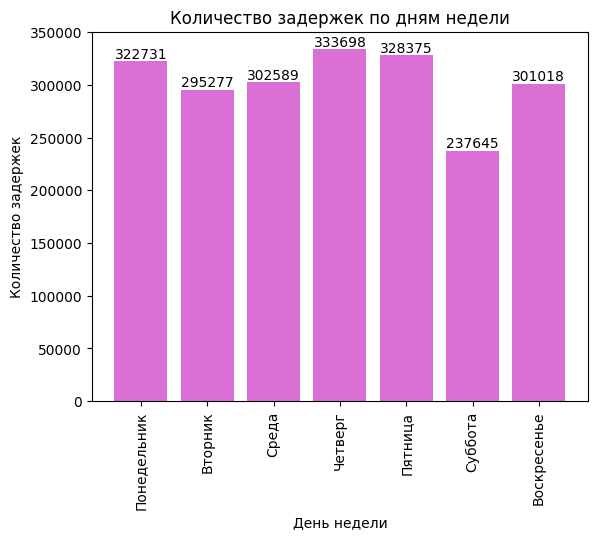

In [184]:
#рассматриваем только те рейсы, у которых время задержки вылета положительно(иначе это не задержка)
filtered_df = df1[df1['DEPARTURE_DELAY'] > 0]
delaycount_df = filtered_df.groupby('DAY_OF_WEEK').size().reset_index(name='DELAY_COUNT')
days_of_week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
delaycount_df['DAY_OF_WEEK'] = delaycount_df['DAY_OF_WEEK'].map(lambda x: days_of_week[x-1])


bars = plt.bar(delaycount_df['DAY_OF_WEEK'], delaycount_df['DELAY_COUNT'], color = 'orchid')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha='center', va='bottom', fontsize=10)
plt.xlabel('День недели')
plt.ylabel('Количество задержек')
plt.title('Количество задержек по дням недели')
plt.xticks(rotation = 90)

plt.show()

На этом графике мы видим, что количество задержек в понедельник, четверг и пятницу не сильно отличается, поэтому стоит рассмотреть картину детальнее, например, проверить, возможно, в эти дни совершается больше полетов, соответственно, и количество задержек увеличивается

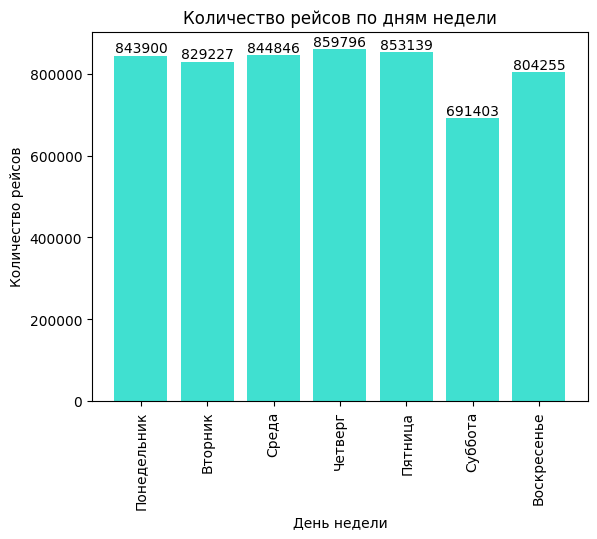

In [183]:
flightcount_df = df1.groupby('DAY_OF_WEEK').size().reset_index(name='FLIGHT_COUNT')


days_of_week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
flightcount_df['DAY_OF_WEEK'] = flightcount_df['DAY_OF_WEEK'].map(lambda x: days_of_week[x-1])


bars = plt.bar(flightcount_df['DAY_OF_WEEK'], flightcount_df['FLIGHT_COUNT'], color = 'turquoise')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha='center', va='bottom', fontsize=10)
plt.xlabel('День недели')
plt.ylabel('Количество рейсов')
plt.title('Количество рейсов по дням недели')
plt.xticks(rotation = 90)

plt.show()

Видим, что количество рейсов примерно равномерно распределено, за исключением субботы, но в субботу и задержек меньше. Чтобы найти какую-то аномалию, рассмотрим процентное соотношение задержек ко всем полетам по дням недели

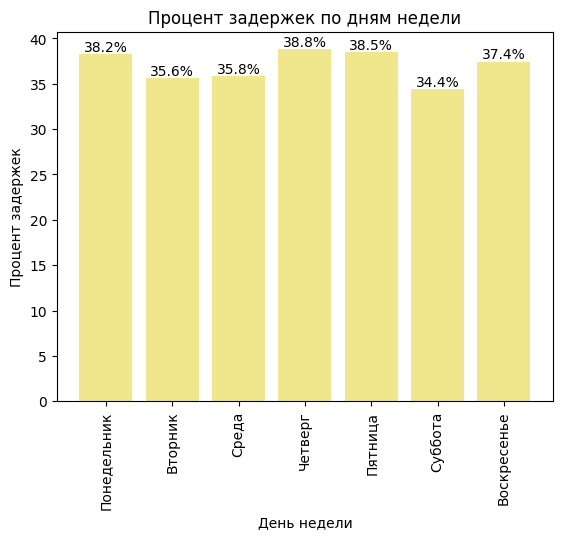

In [181]:
ratio_df = pd.merge(delaycount_df, flightcount_df, on='DAY_OF_WEEK')

ratio_df['DELAY_RATIO'] = ratio_df['DELAY_COUNT'] / ratio_df['FLIGHT_COUNT']*100
bars = plt.bar(ratio_df['DAY_OF_WEEK'], ratio_df['DELAY_RATIO'], color = 'khaki')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('День недели')
plt.ylabel('Процент задержек')
plt.title('Процент задержек по дням недели')
plt.xticks(rotation = 90)

plt.show()



Если сравним этот график с предыдущим, увидим, что с увеличением количества полетов увеличивается процент задержек: в понедельник, четверг и пятницу у аэропортов наибольшая нагрузка, поэтому и  процент задержек выше

Далее проверим, как обстоят дела со средним временем задержки по дням недели

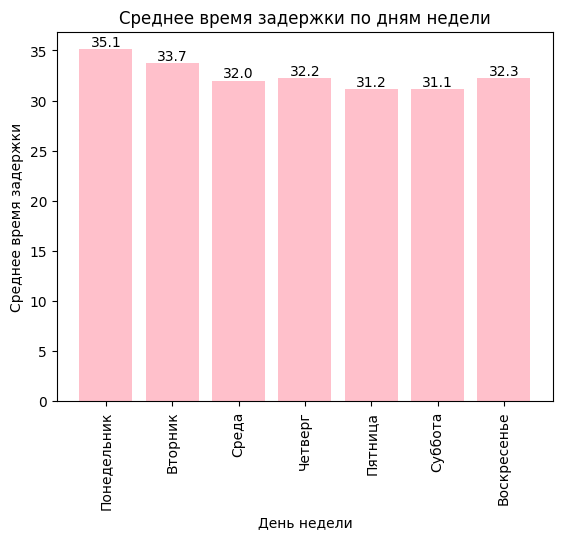

In [177]:
filtered_df = df1[df1['DEPARTURE_DELAY'] > 0]
meandelay_df = filtered_df.groupby("DAY_OF_WEEK")["DEPARTURE_DELAY"].mean().reset_index(name = 'MEAN_DELAY')
days_of_week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
meandelay_df['DAY_OF_WEEK'] = meandelay_df['DAY_OF_WEEK'].map(lambda x: days_of_week[x-1])
bars = plt.bar(meandelay_df['DAY_OF_WEEK'], meandelay_df['MEAN_DELAY'], color = 'pink')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)
plt.xlabel('День недели')
plt.ylabel('Среднее время задержки')
plt.title('Среднее время задержки по дням недели')
plt.xticks(rotation = 90)

plt.show()

Видим, что картина немного другая: наибольшее среднее время задержки в понедельник, а в другие дни среднее время не сильно отличается. Скорее всего, это связано с началом рабочей недели и следовательно с повышенным количеством полетов в этот день

Далее рассмотрим, как распределено среднее время задержки в течение дня

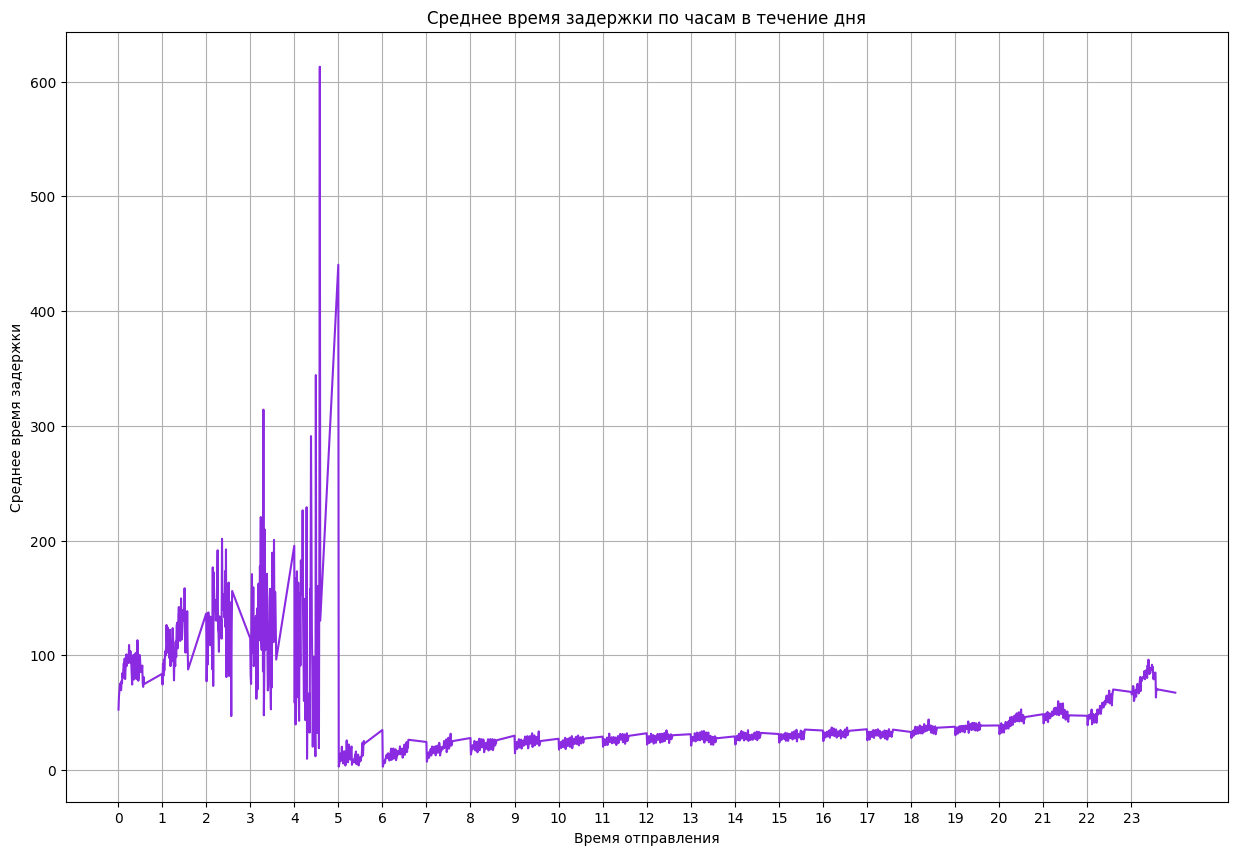

In [185]:
filtered_df = df1[df1['DEPARTURE_DELAY'] > 0]
delaytime_df = filtered_df.groupby(['DEPARTURE_TIME'])['DEPARTURE_DELAY'].mean().reset_index(name = 'DELAY_COUNT')
plt.figure(figsize=(15, 10))
plt.plot(delaytime_df['DEPARTURE_TIME']/100, delaytime_df['DELAY_COUNT'], color = 'blueviolet')
plt.grid()
plt.xlabel('Время отправления')
plt.ylabel('Среднее время задержки')
plt.title('Среднее время задержки по часам в течение дня')
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)])

plt.show()

Наиболее длительные задержки приходятся на ночные часы, а днем среднее время задержки существенно меньше. Это может быть связано с ухудшением видимости ночью или с недостатком рабочего персонала в ночную смену.

Далее рассмотрим, как зависят количество задержек и среднее время задержки вылета от авиакомпании

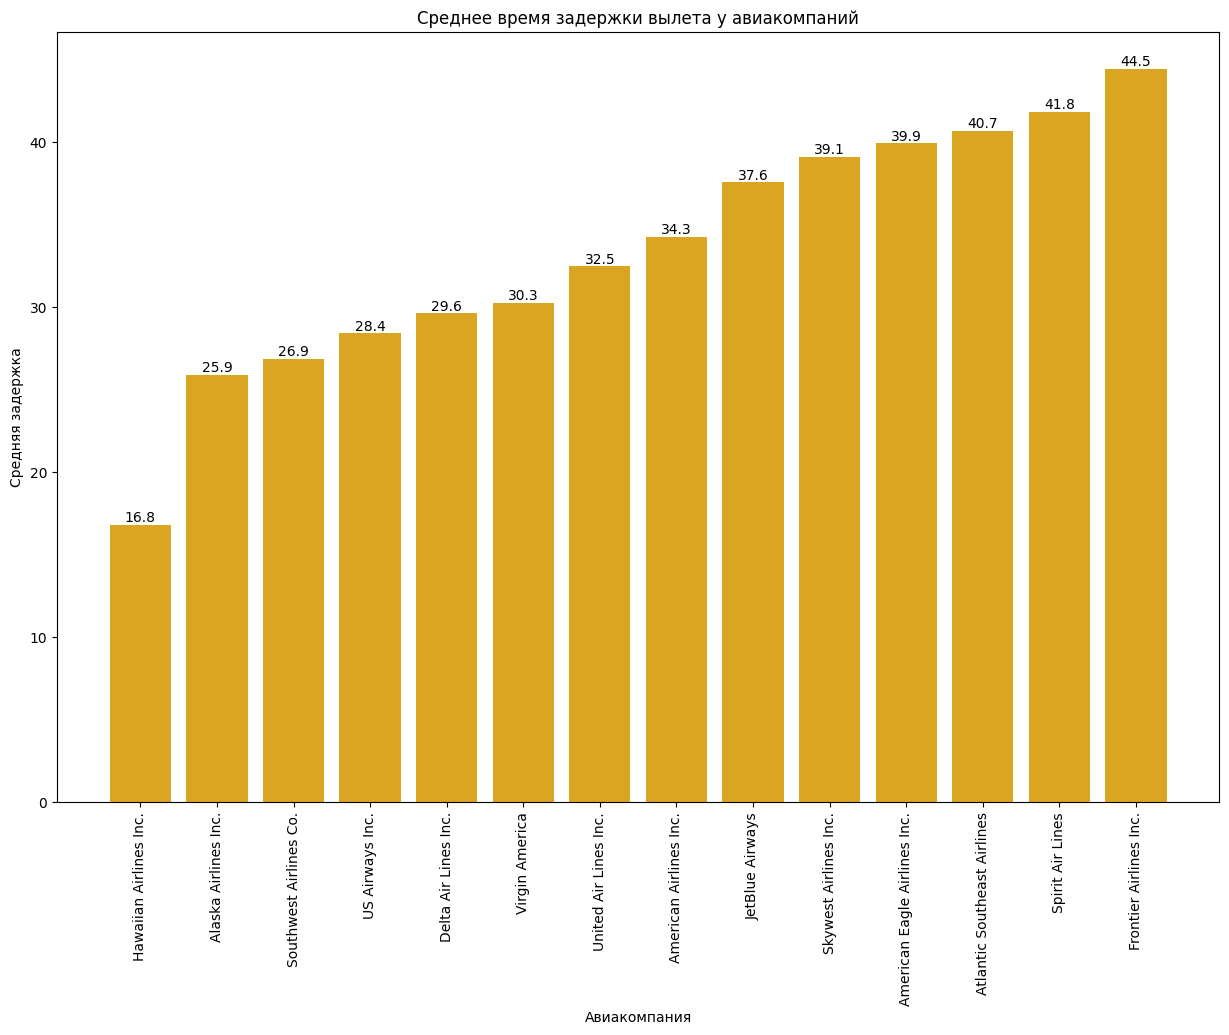

In [176]:

flights_with_airlines = pd.merge(filtered_df, df3, left_on='AIRLINE', right_on='IATA_CODE', how='left')
airlineavgdelay = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].mean().sort_values().reset_index(name = 'DELAY_AVG')
plt.figure(figsize=(15, 10))
bars = plt.bar(airlineavgdelay['AIRLINE_y'], airlineavgdelay['DELAY_AVG'], color = 'goldenrod')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Среднее время задержки вылета у авиакомпаний')
plt.xlabel('Авиакомпания')
plt.ylabel('Средняя задержка')
plt.xticks(rotation=90)
plt.show()

Выявили компанию с наибольшим средним временем задержки. Это компания Frontier Airlines. Хоть это и может говорить о плохой эффективности компании, нам нужно рассмотреть и другие метрики, например, узнать о количестве задержек рейсов этой компании в сравнении с другими.

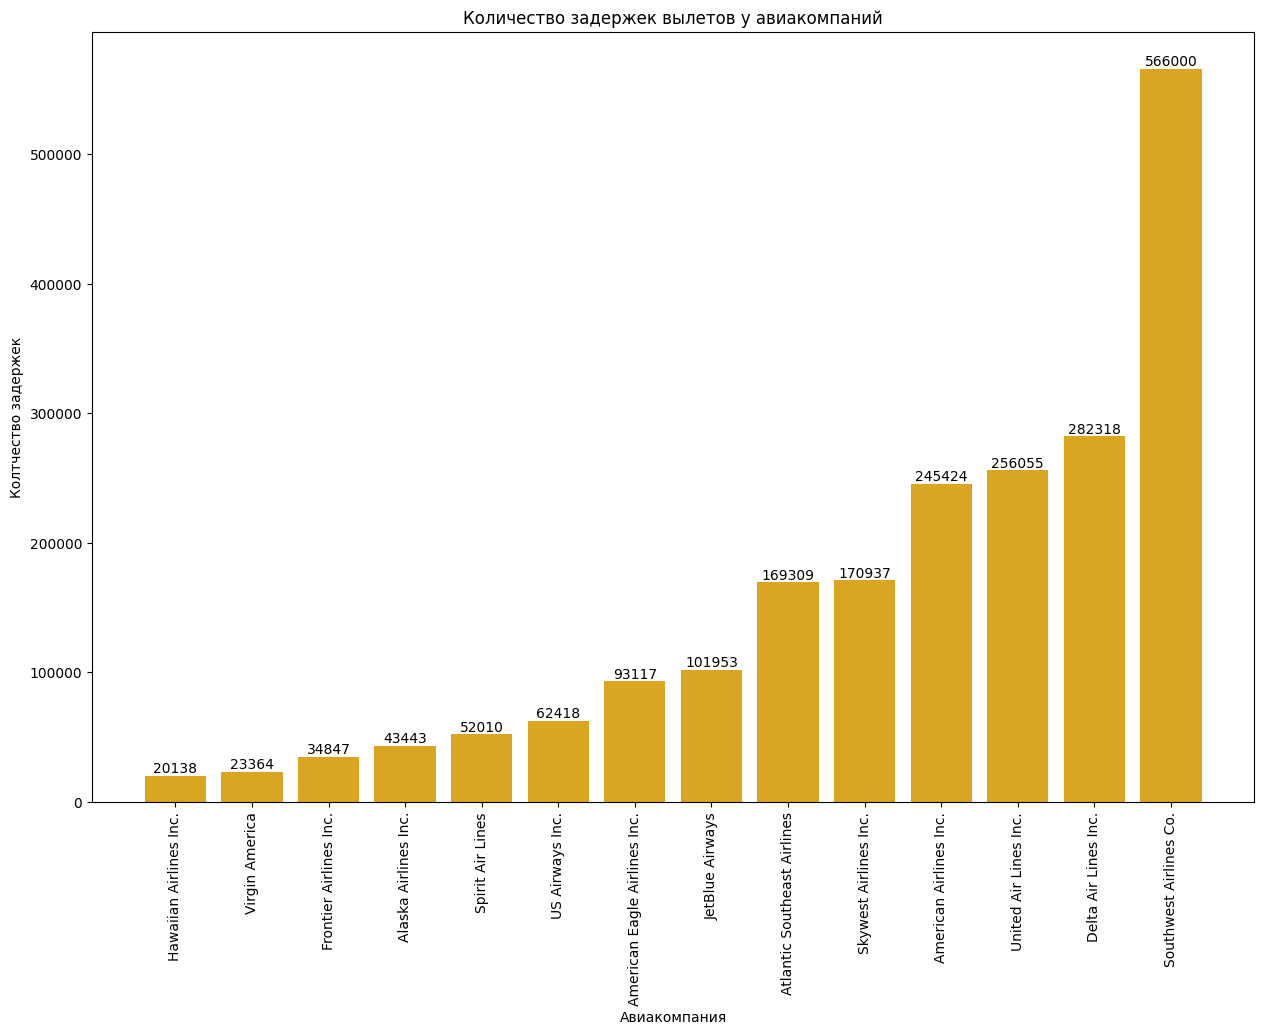

In [175]:
flights_with_airlines = pd.merge(filtered_df, df3, left_on='AIRLINE', right_on='IATA_CODE', how='left')
airlineavgdelay = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].size().sort_values().reset_index(name = 'DELAY_COUNT')
plt.figure(figsize=(15, 10))

bars = plt.bar(airlineavgdelay['AIRLINE_y'], airlineavgdelay['DELAY_COUNT'], color = 'goldenrod')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha='center', va='bottom', fontsize=10)
plt.title('Количество задержек вылетов у авиакомпаний')
plt.xlabel('Авиакомпания')
plt.ylabel('Колтчество задержек')
plt.xticks(rotation=90)
plt.show()

Оказывается, у компании Frontier Airlines не так уж много задержек. Видимо, среднее время задержки у нее выше из-за некоторых единичных серьезных ситуаций. Всякое бывает. Аналогичная ситуация и у других лидеров предыдущего топа: Spirit Air Lines и Atlantic Southwest Airlines.

А вот у компании Southwest Airlines Co., возможно, серьезные проблемы: она лидирует по количеству задержек с огромным отрывом от конкурентов. Это либо выброс, либо эта компания с большим отрывом крупнейший перевозчик, либо они просто плохо работают. Проверим это, проанализировав компании с наибольшим количеством рейсов

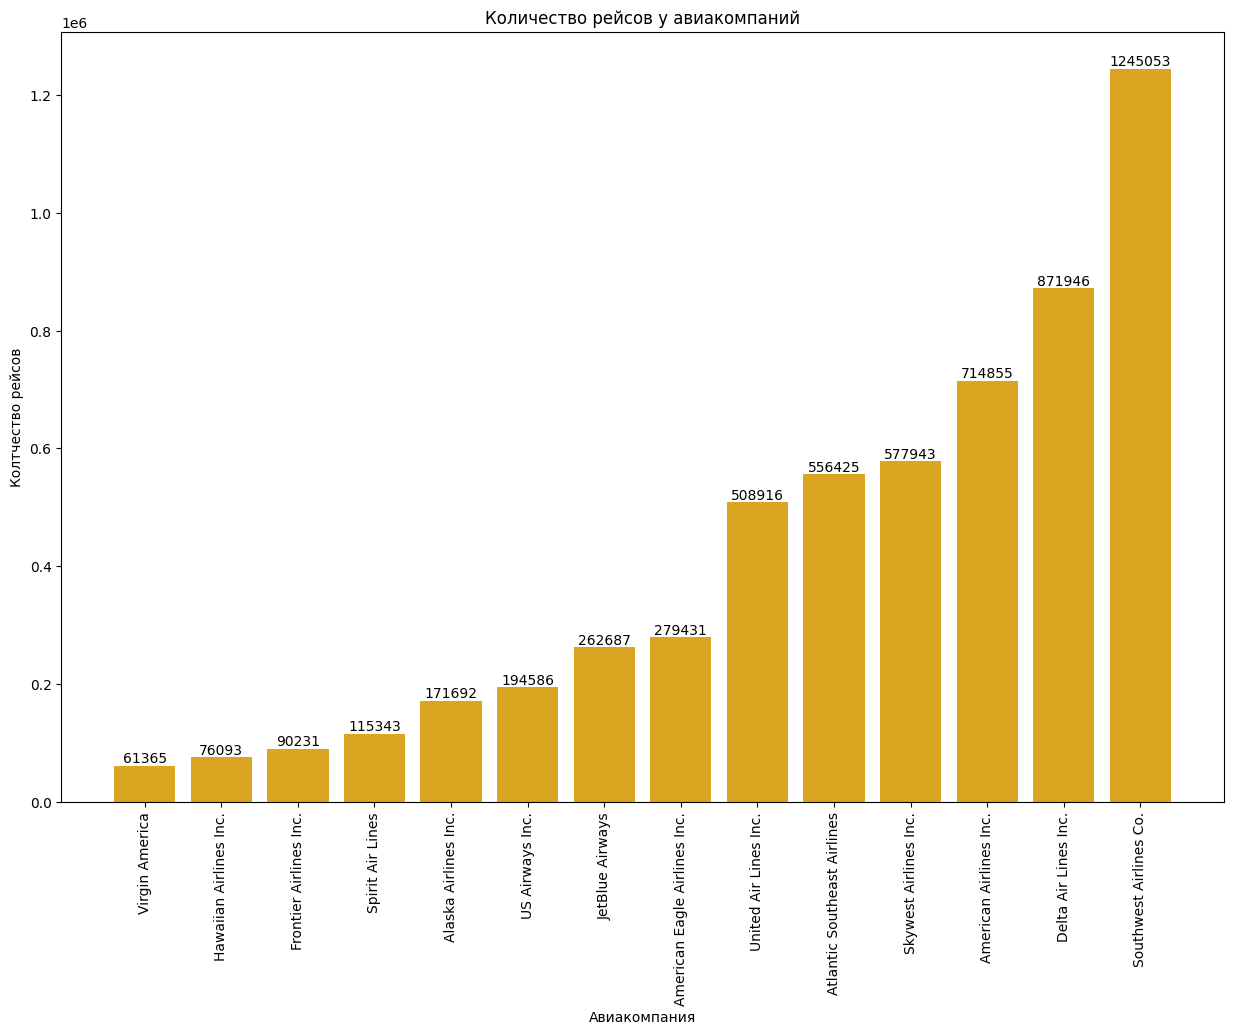

In [174]:
flights_with_airlines = pd.merge(df1, df3, left_on='AIRLINE', right_on='IATA_CODE', how='left')
airlineflightcount_df = flights_with_airlines.groupby('AIRLINE_y').size().sort_values().reset_index(name = 'FLIGHT_COUNT')
plt.figure(figsize=(15, 10))

bars = plt.bar(airlineflightcount_df['AIRLINE_y'], airlineflightcount_df['FLIGHT_COUNT'], color = 'goldenrod')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha='center', va='bottom', fontsize=10)
plt.title('Количество рейсов у авиакомпаний')
plt.xlabel('Авиакомпания')
plt.ylabel('Колтчество рейсов')
plt.xticks(rotation=90)
plt.show()

Действительно, Southwest Airlines Co. - лидер и по количеству перевозок, поэтому у нее нет проблем. Большое количество задержек при большом количестве рейсов - это нормально. Но для достоверности можно построить еще один график - процент задержек от общего количества полетов в зависимости от компании

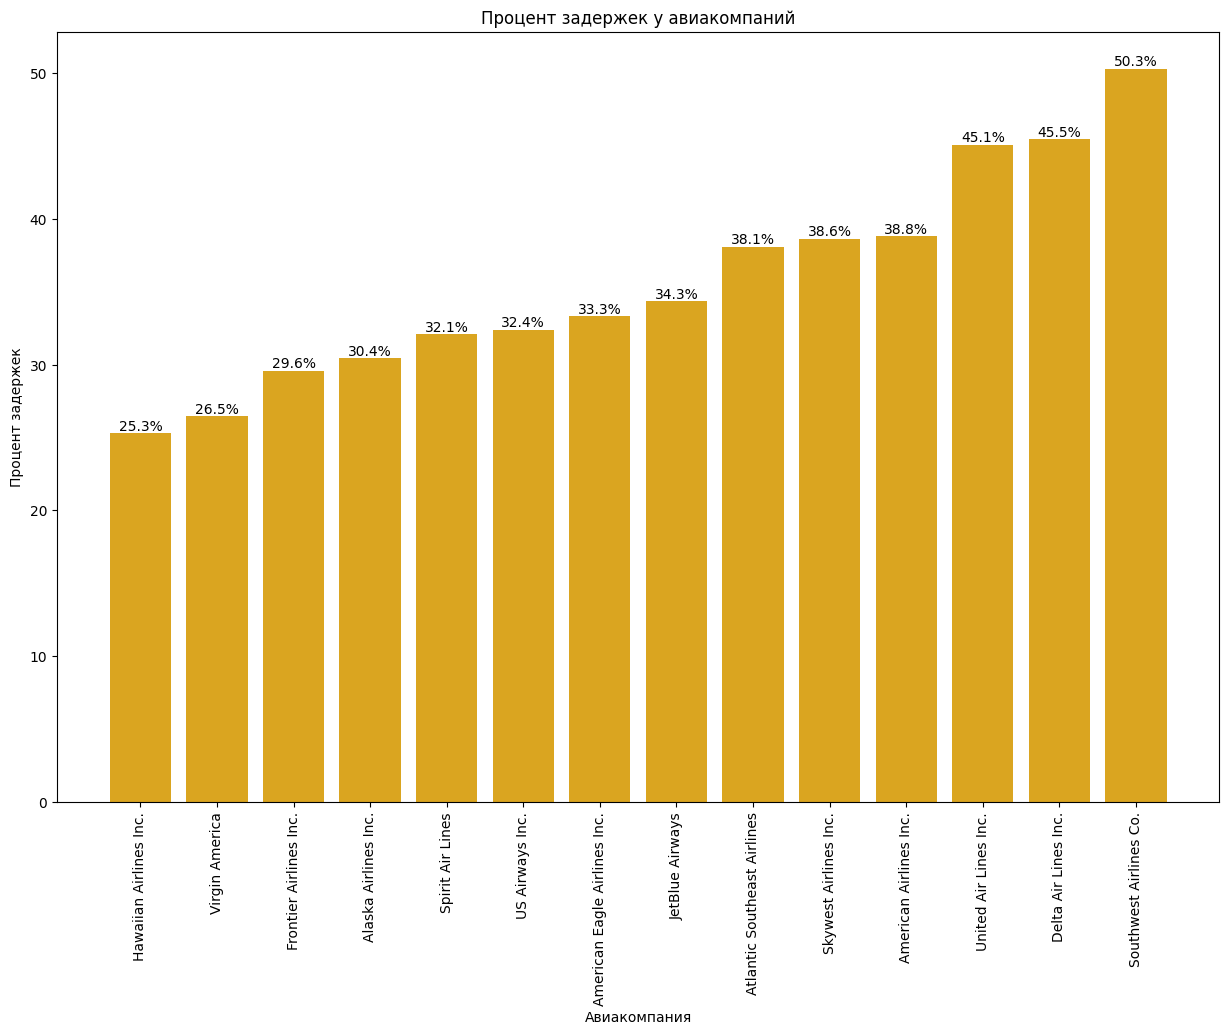

In [165]:
percentofdelay = pd.merge(airlineavgdelay, airlineflightcount_df, on = 'AIRLINE_y', how = 'left')
percentofdelay['DELAY_RATIO'] = percentofdelay['DELAY_COUNT'] / percentofdelay['FLIGHT_COUNT']*100

plt.figure(figsize=(15, 10))
bars = plt.bar(percentofdelay['AIRLINE_y'], percentofdelay['DELAY_RATIO'].sort_values(), color = 'goldenrod')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Авиакомпания')
plt.ylabel('Процент задержек')
plt.title('Процент задержек у авиакомпаний')
plt.xticks(rotation = 90)

plt.show()


Все таки, у Southwest Airlines большой процент задержек относительно всех полетов. Это не очень хорошо, это может быть вызвано недостатком сотрудников, некачественной техникой, погоней за прибылью в ущерб качеству у этой авиакомпании

Проанализируем, как зависит среднее время задержки от аэропорта вылета

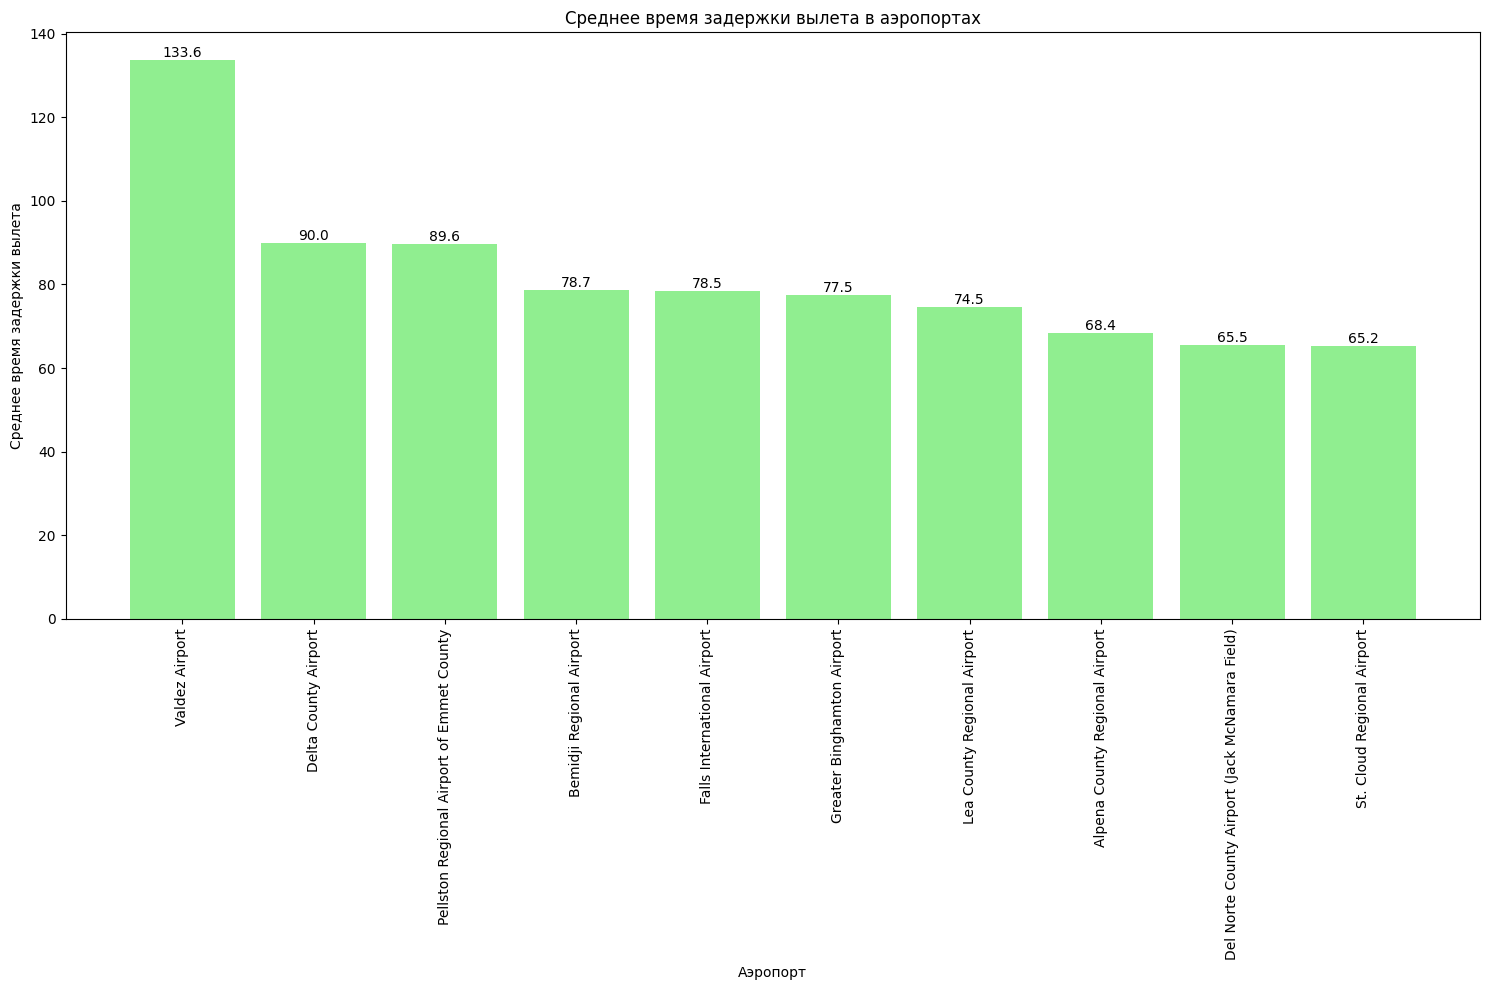

In [186]:

avg_delay_by_airport = filtered_df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()
avg_delay_by_airport.rename(columns={'ORIGIN_AIRPORT': 'IATA_CODE', 'DEPARTURE_DELAY': 'AVG_DEPARTURE_DELAY'}, inplace=True)
airports_with_delay = pd.merge(df2, avg_delay_by_airport, on='IATA_CODE', how='left')
top_airports_delay = airports_with_delay.nlargest(10, 'AVG_DEPARTURE_DELAY')
plt.figure(figsize=(15, 10))
bars = plt.bar(top_airports_delay['AIRPORT'], top_airports_delay['AVG_DEPARTURE_DELAY'], color='lightgreen')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Среднее время задержки вылета в аэропортах')
plt.xlabel('Аэропорт')
plt.ylabel('Среднее время задержки вылета')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Лидер по времени задержки - аэропорт Valdez. В среднем задержка составляет более 2 часов. Министерству транспорта стоит проверить его. Возможно, там есть проблемы с персоналом, техникой, финансированием.

Далее проверим, какие причины чаще всего приводят к задержкам вылетов

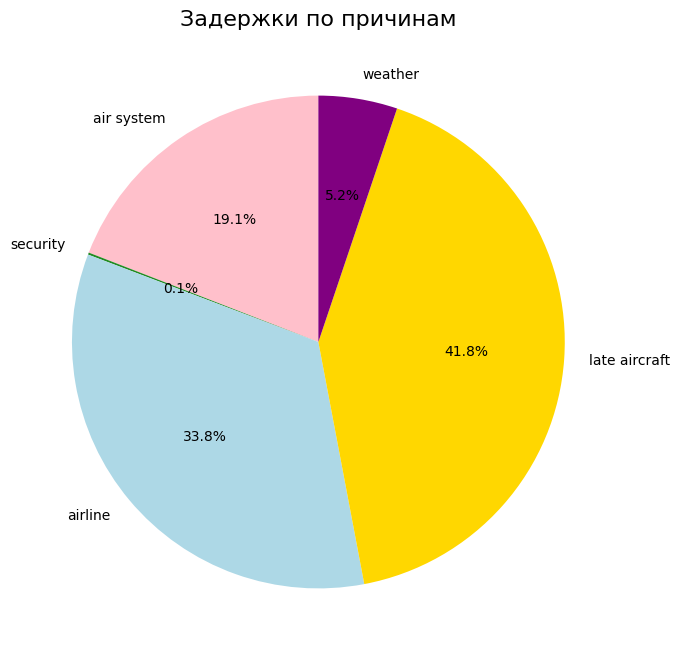

In [173]:

delay_causes = filtered_df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum()
labels = ['air system', 'security', 'airline', 'late aircraft', 'weather']
plt.figure(figsize=(8, 8))
plt.pie(delay_causes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['pink', 'forestgreen', 'lightblue', 'gold', 'purple'])
plt.title('Задержки по причинам', fontsize=16)
plt.show()

Самые частые причины задержек - позднее прибытие самолета и по причине проблем внутри авиакомпании. Причина позднего прибытия самолета обьясняется тем, что опоздавший самолет в свой предыдущий полет уже вылетел с задержкой. То есть получается замкнутый круг: причиной задержки является предыдущая задержка.
Вторая по распространенности причина заключается в проблемах на стороне авиакомпании. Это могут быть финансовые проблемы (условно авиакомпания не рассчитала затраты на топливо и самолет задерживается в ожидании заправки или у компании нет денег на качественное техобслуживание самолетов), или ошибки авиакомпании в планировании полетов, или компания из-за забастовки работников задерживает рейс

Далее посмотрим, как задержки зависят от месяца

<ipython-input-172-23d4a164a91c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MONTH'] = filtered_df['DATE'].dt.month


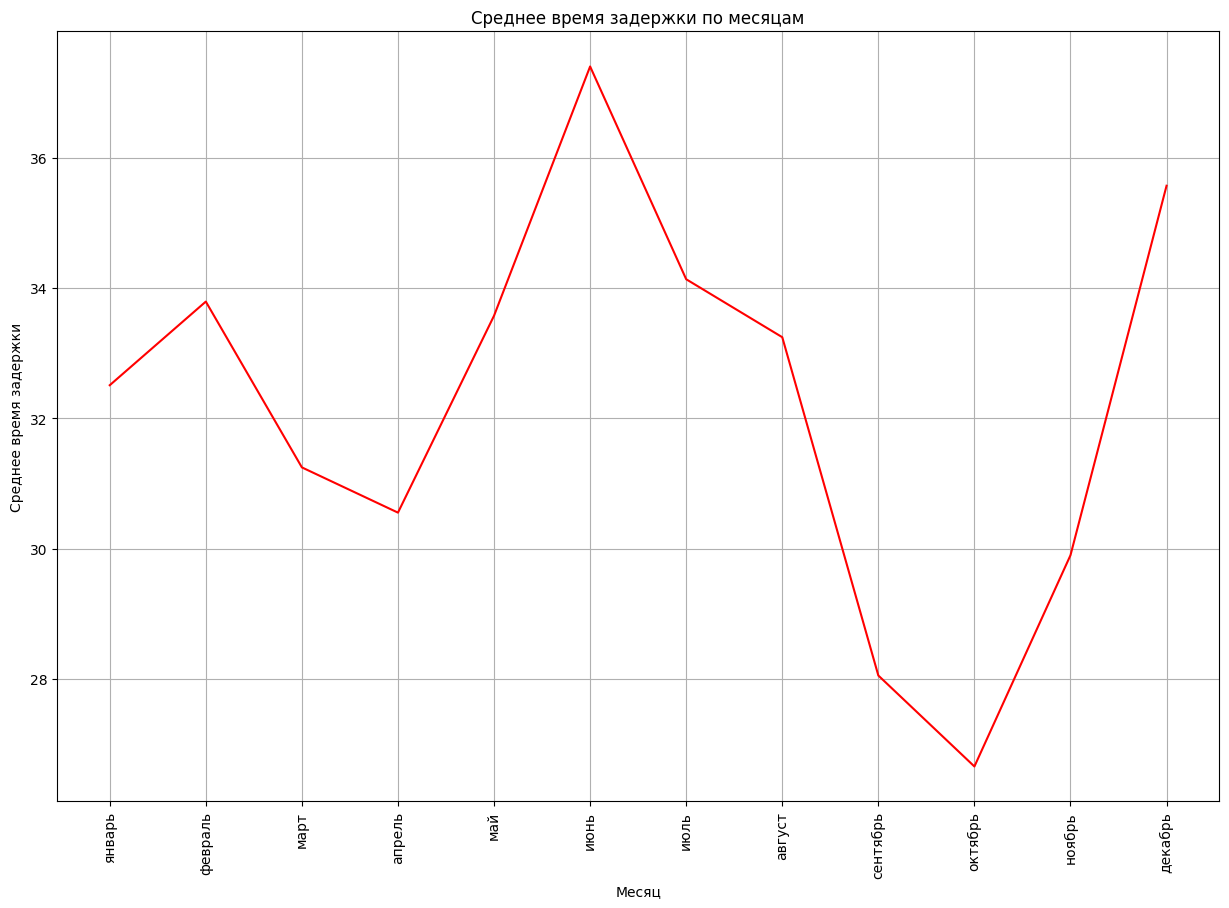

In [172]:
filtered_df['MONTH'] = filtered_df['DATE'].dt.month
monthly_delay = filtered_df.groupby('MONTH')['DEPARTURE_DELAY'].mean().reset_index(name = 'MONTHLY_DELAY')
months = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
monthly_delay['MONTH'] = monthly_delay['MONTH'].map(lambda x: months[x-1])
plt.figure(figsize = (15, 10))
plt.plot(monthly_delay['MONTH'], monthly_delay['MONTHLY_DELAY'], color = 'red')

plt.xlabel('Месяц')
plt.ylabel('Среднее время задержки')
plt.title('Среднее время задержки по месяцам')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Наибольшее время задержек - в июне и декабре. Видимо, в эти месяцы на аэропорты приходится наибольшая нагрузка - путешествуют чаще всего на каникулах. В декабре время задержки может быть связано с непогодой и повышенными временными затратами на подготовку самолета к полету.

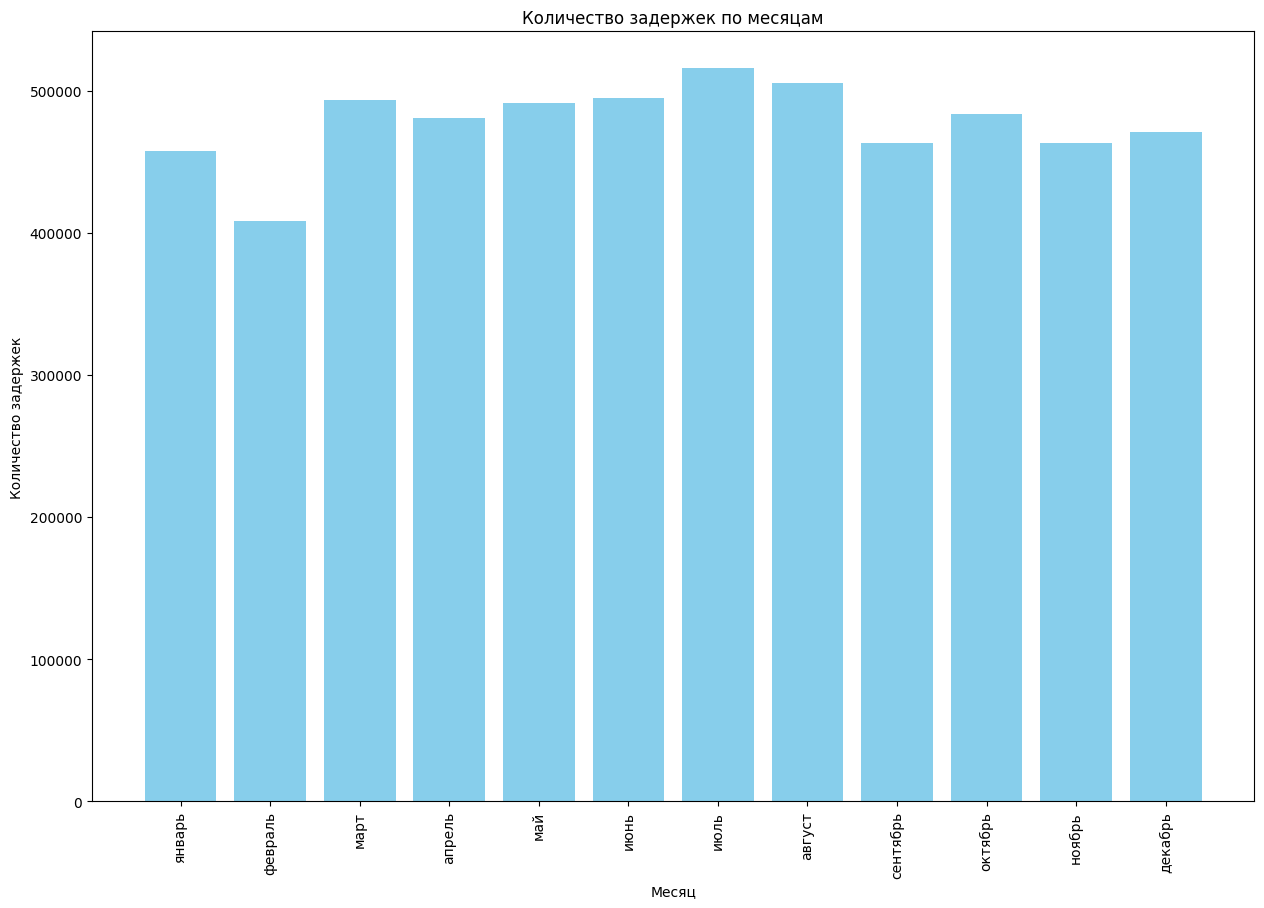

In [171]:
df1['MONTH'] = df1['DATE'].dt.month
flightcount_df = df1.groupby('MONTH').size().reset_index(name='FLIGHT_COUNT')
months = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
flightcount_df['MONTH'] = flightcount_df['MONTH'].map(lambda x: months[x-1])
plt.figure(figsize = (15, 10))
plt.bar(flightcount_df['MONTH'], flightcount_df['FLIGHT_COUNT'], color = 'skyblue')

plt.xlabel('Месяц')
plt.ylabel('Количество задержек')
plt.title('Количество задержек по месяцам')
plt.xticks(rotation = 90)

plt.show()

Видим, что количество задержек примерно одинаково в каждом месяце на протяжении всего года

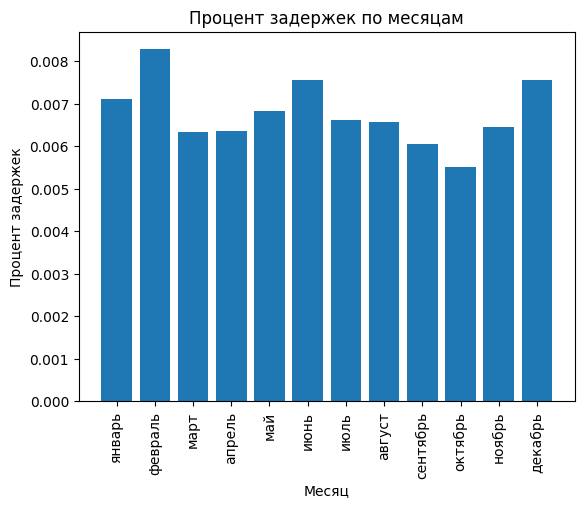

In [98]:
ratiomonthly_df = pd.merge(monthly_delay, flightcount_df, on='MONTH')

ratiomonthly_df['DELAY_RATIO'] = ratiomonthly_df['MONTHLY_DELAY'] / ratiomonthly_df['FLIGHT_COUNT']*100
plt.bar(ratiomonthly_df['MONTH'], ratiomonthly_df['DELAY_RATIO'])

plt.xlabel('Месяц')
plt.ylabel('Процент задержек')
plt.title('Процент задержек по месяцам')
plt.xticks(rotation = 90)

plt.show()

Но наибольший процент количества задержек наблюдается в феврале. Это может быть так же связано с погодными условиями в зимний период